In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utils_decentralized_gaussian import *
from collections import OrderedDict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Evaluation of Decentralized Thompson Sampling for different network topologies

#### Experiment Names:

Experiment number 1: 3 arms with Gaussian mean [0.1, 0.2, 0.5] and sigma 1.

Experiment number 2: 17 arms with Gaussian mean [0.5, 0.1, ...., 0.1] and sigma 1.

Experiment number 3: 4 arms with Gaussian mean [0.2646, 0.6135, 0.8950, 0.5764] with sigma 1. 

##### Network Topologies considered:

cycle (3 regular graph with self loops)

5 regular graph with self loops

grid

complete


In [2]:
# Parameters for run-time
max_iter = 800
runs = 2000

# Parameters for underlying MAB model
exp_num = 2
#theta = np.array([0.1, 0.2, 0.5]) # experiment 1
theta = np.array([0.5] + [0.1] * 16) # experiment 2
#theta = np.array([0.2646, 0.6135, 0.8950, 0.5764]) # experiment 3
num_arms = len(theta)
sigma = 1

# Parameters for Thompson Sampling
mean_vec = np.zeros(num_arms)
sigma_vec = np.ones(num_arms)

In [3]:
N = 64

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

In [4]:
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N64_cycle'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_cycle'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='cycle', save = True, rerun=False)

Saved file was loaded


In [13]:
W = compute_W(N, type='5regular')
avg_cumm_regret['ts_N64_5regular'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_5regular'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='5regular', save = True, rerun=False)

Saved file was loaded


In [10]:
W = compute_W(N, type='grid')

avg_cumm_regret['ts_N64_grid'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_grid'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='grid', save = True, rerun=False)

Saved file was loaded


In [14]:
W = compute_W(N, type='complete')
avg_cumm_regret['ts_N64_complete'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_complete'] = run_MultiAgent_TS(max_iter, runs, W, mean_vec, sigma_vec, theta, sigma, exp_num, type_W ='complete', save = True, rerun=False)

Saved file was loaded


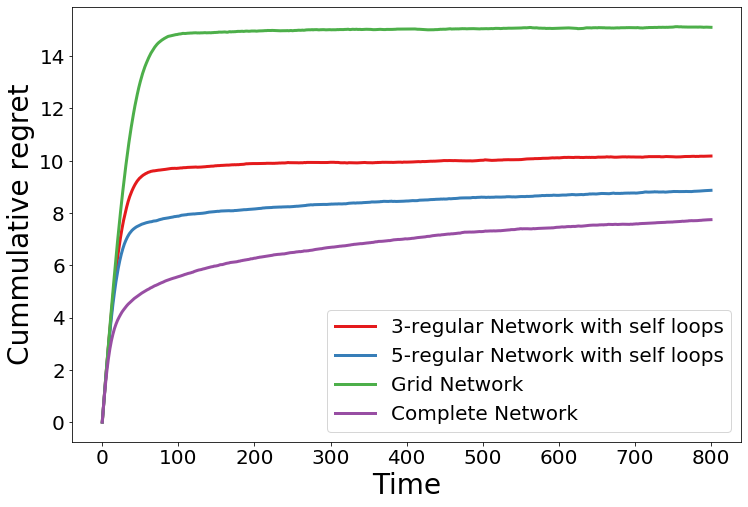

In [16]:
plt.figure(figsize=(12,8))

cycle_plot, = plt.plot(avg_cumm_regret['ts_N64_cycle'], color='#e41a1c', label = r"6-regular Network with self loops", linewidth=3)
regular_plot, = plt.plot(avg_cumm_regret['ts_N64_5regular'], color='#377eb8', label = r"10-regular Network with self loops", linewidth=3)
grid_plot, = plt.plot(avg_cumm_regret['ts_N64_grid'], color='#4daf4a', label = r"Grid Network", linewidth=3)
complete_plot, = plt.plot(avg_cumm_regret['ts_N64_complete'], color='#984ea3', label = r"Complete Network", linewidth=3)

plt.xlabel("Time", fontsize = 28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r"Cummulative regret", fontsize = 28)
plt.legend(handles=[cycle_plot, regular_plot, grid_plot, complete_plot], loc='lower right', fontsize = 20)
#plt.title("Cumulative Regret Over Time")
filename = 'results_N{}_T{}_NetworkTopology_GaussianExp{}.pdf'.format(N, max_iter, exp_num)
plt.savefig(filename, bbox_inches='tight')
plt.show()